In this work we will predict diabetes using Machine Learning models .The daset used in this workflow is avaliable at Kaggle website. 
The current language program is python 3. 

In [2]:
#Importing the necessaries libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# loading the data and taking a look
df = pd.read_csv(r"C:\Users\mclar\Downloads\pima-data.csv")
df.head(10)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,0,25.6,0.201,30,0.0000,False
6,3,78,50,32,88,31.0,0.248,26,1.2608,True
7,10,115,0,0,0,35.3,0.134,29,0.0000,False
8,2,197,70,45,543,30.5,0.158,53,1.7730,True
9,8,125,96,0,0,0.0,0.232,54,0.0000,True


In [4]:
df.shape

(768, 10)

### 1- Checking if theres is a null value in our dataset

In [7]:
# Verifieng if there is any Missing values
df.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

In [9]:
#Other way
df.isnull().values.any()

False

### We can see the correlation between all the parameters in a graph or in a table

In [10]:
corree = df.corr(method = "pearson")
corree
mask = np.triu(corree)

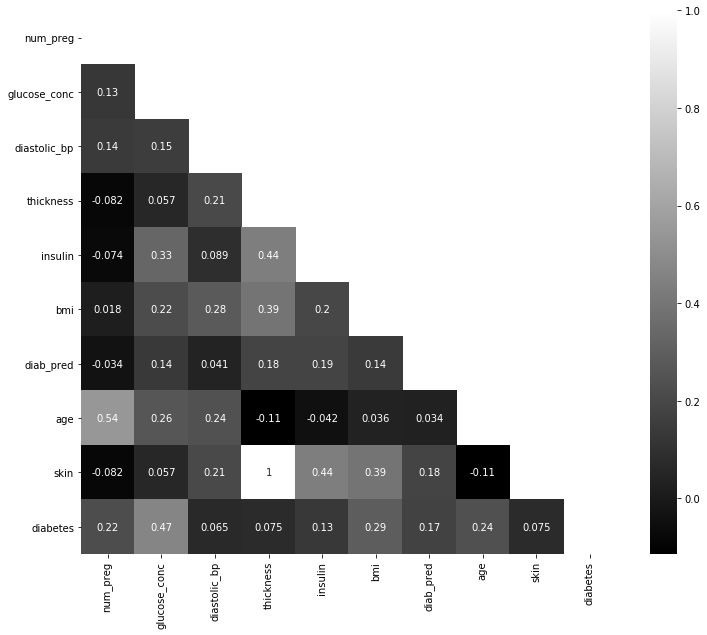

In [14]:
## correlations
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,10))
g = sns.heatmap(df[top_corr_features].corr(),mask = mask, annot =True, cmap = 'gray')

In [15]:
#Correlation on table
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


### Changing the data type of the diabetes column from boolen to numeric since is more easy to our model to predict when the values varies from 0 to 1

In [6]:
zero =len(df.loc[df['diabetes']==True])
zero

268

In [27]:
zero =len(df.loc[df['diabetes']==False])
zero

500

In [16]:
diabete_alterada = {True:1, False:0}

In [17]:
df['diabetes'] = df['diabetes'].map(diabete_alterada)
df

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912,0
764,2,122,70,27,0,36.8,0.340,27,1.0638,0
765,5,121,72,23,112,26.2,0.245,30,0.9062,0
766,1,126,60,0,0,30.1,0.349,47,0.0000,1


### Through the bottom line we can see where and how much data there is with diabetes and without diabetes

In [18]:
diabetes_true_count = len(df.loc[df['diabetes']==True])
diabetes_false_count = len(df.loc[df['diabetes']==False])
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [19]:
# we can also see for especificy age how many person have diabete

In [20]:
pp =len(df.loc[df['age']==50])

ff = len(df.loc[df['age']==23])
(pp,ff)

(8, 38)

## Machine learning

### Now we will start implementing our M.models to dataset, firts we spilt the data set in the y colum (wich is the target) and x colums

In [22]:
from sklearn.model_selection import train_test_split
feature_colums = ['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age','skin']
predicted_class = ['diabetes']

In [23]:
X = df[feature_colums].values
y = df[predicted_class].values

# A parte .values faz com que seja criada uma matrix
# sem seria criada um dataframe normal

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

### Cheking how many row have a 0 value in our dataframe 

In [87]:
print("total number of rows : {0}".format(len(df)))
print("number of rows missing num_preg: {0}".format(len(df.loc[df['num_preg'] == 0])))
print("number of rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("number of rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("number of rows missing age: {0}".format(len(df.loc[df['age'] == 0])))
print("number of rows missing skin: {0}".format(len(df.loc[df['skin'] == 0])))

total number of rows : 768
number of rows missing num_preg: 111
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [104]:
#Other way
df.isin([0]).sum() 

num_preg        111
glucose_conc      5
diastolic_bp     35
thickness       227
insulin         374
bmi              11
diab_pred         0
age               0
skin            227
diabetes        500
dtype: int64

In [88]:
#We will fill every row with o 0 value with the 'mean'
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=0, strategy='mean',)

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [89]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [90]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.753


### The random forest model had a curacy of 0,75, and it is not bad at all

But we can make a Hyperparameter optimization, hyperparameter is a parameter whose value is used to control the learning process. On the other hand, the values of other parameters are derived through training.

In [91]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

## Hyperparameter optimization using RandomizedSearchCV


In [92]:
! pip install xgboost
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [93]:
classifier=xgboost.XGBClassifier()

In [94]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [95]:
random_search.fit(X_train, y_train)
print(random_search.best_estimator_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  25 | elapsed:    3.0s remaining:   22.4s
[Parallel(n_jobs=-1)]: Done  12 out of  25 | elapsed:    3.1s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:    3.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.1s finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


D:\Programas_Data\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programas_Data\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [96]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [97]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y.ravel(),cv=10)

In [98]:
score

array([0.68831169, 0.77922078, 0.72727273, 0.63636364, 0.72727273,
       0.80519481, 0.79220779, 0.79220779, 0.73684211, 0.77631579])

In [99]:
score.mean()

0.746120984278879

### with the Hyperparameter optimization we had a mean score of 0.74, almost the same with the score of random_forest_model, this mean that both had almost the same performance